In [1]:
# Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, \
                            accuracy_score, precision_score, recall_score, \
                            f1_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [2]:
df_80 = pd.read_csv('churn-bigml-80.csv')
df_20 = pd.read_csv('churn-bigml-20.csv')
df = pd.concat([df_80, df_20], ignore_index=True, sort=False)

df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

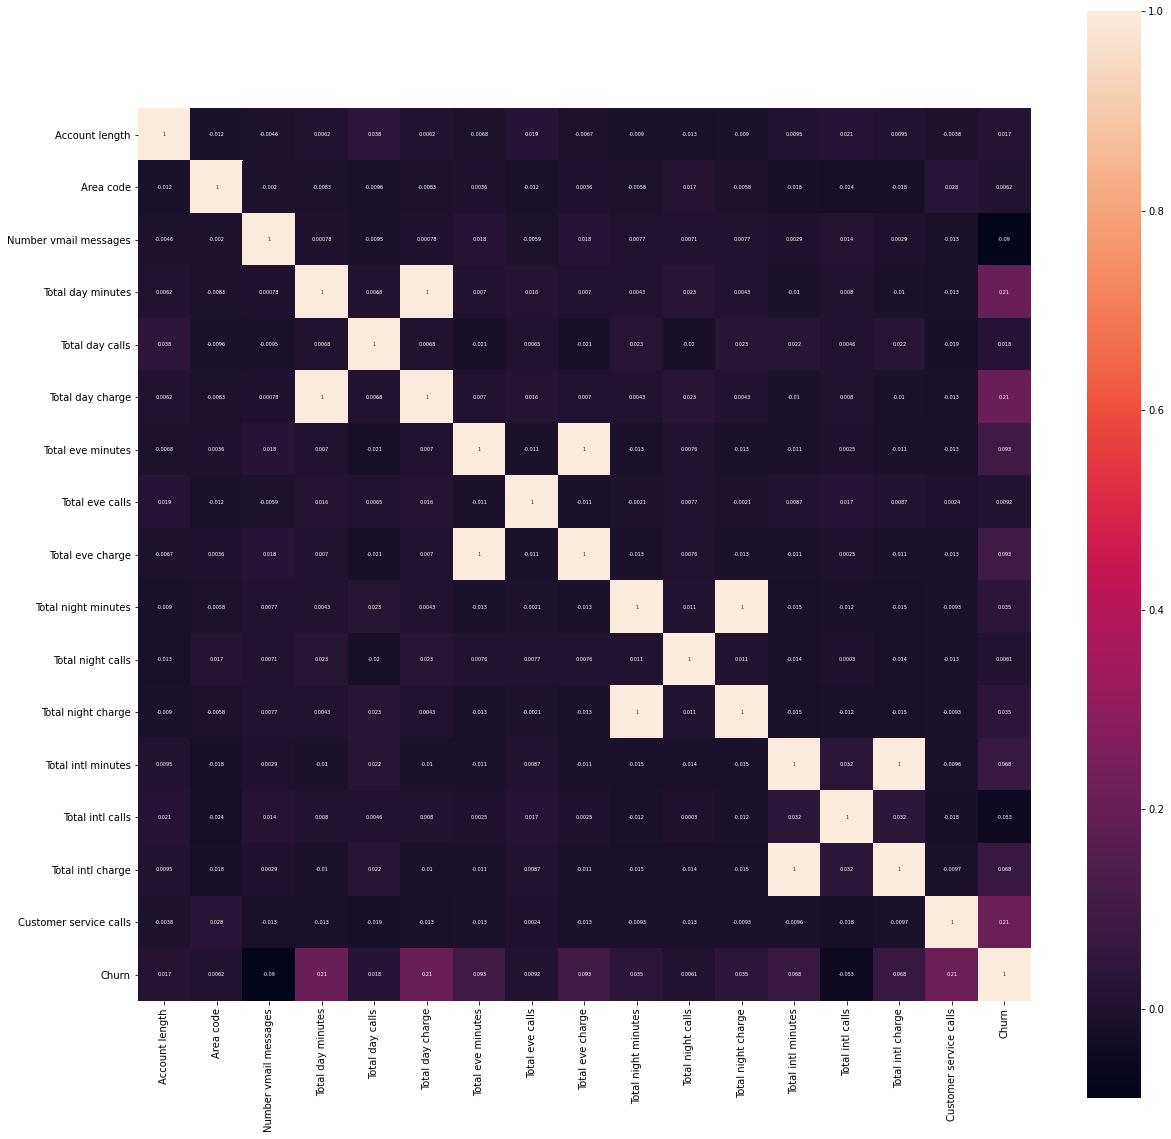

In [5]:
# Mapa de calor
corr = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot_kws={'size': 5}, square=True, annot=True)

plt.show()

In [6]:
# Removendo colunas com alta correlação
df.drop('Total eve charge', inplace=True, axis=1)
df.drop('Total day charge', inplace=True, axis=1)
df.drop('Total night charge', inplace=True, axis=1)
df.drop('Total intl charge', inplace=True, axis=1)

df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


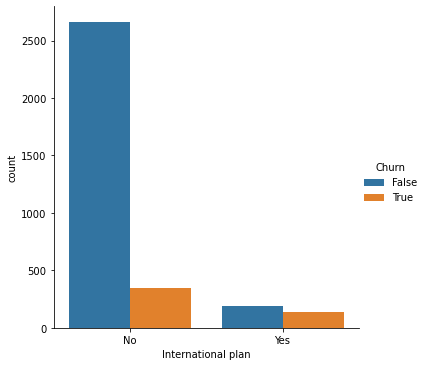

In [7]:
# Vendo churn por plano
sns.factorplot('International plan', data=df,  hue='Churn', kind='count')

<AxesSubplot:ylabel='None'>

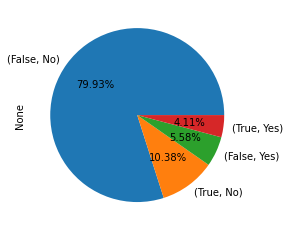

In [8]:
# Verificando maior churn nas pessoas com plano internacional
df[['Churn', 'International plan']].value_counts().plot.pie(autopct='%1.2f%%')

C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


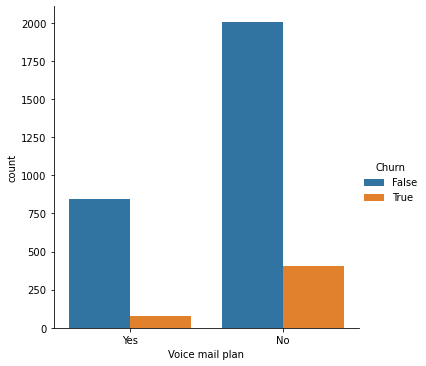

In [9]:
# Vendo voice mail
sns.factorplot('Voice mail plan', data=df,  hue='Churn', kind='count')

C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


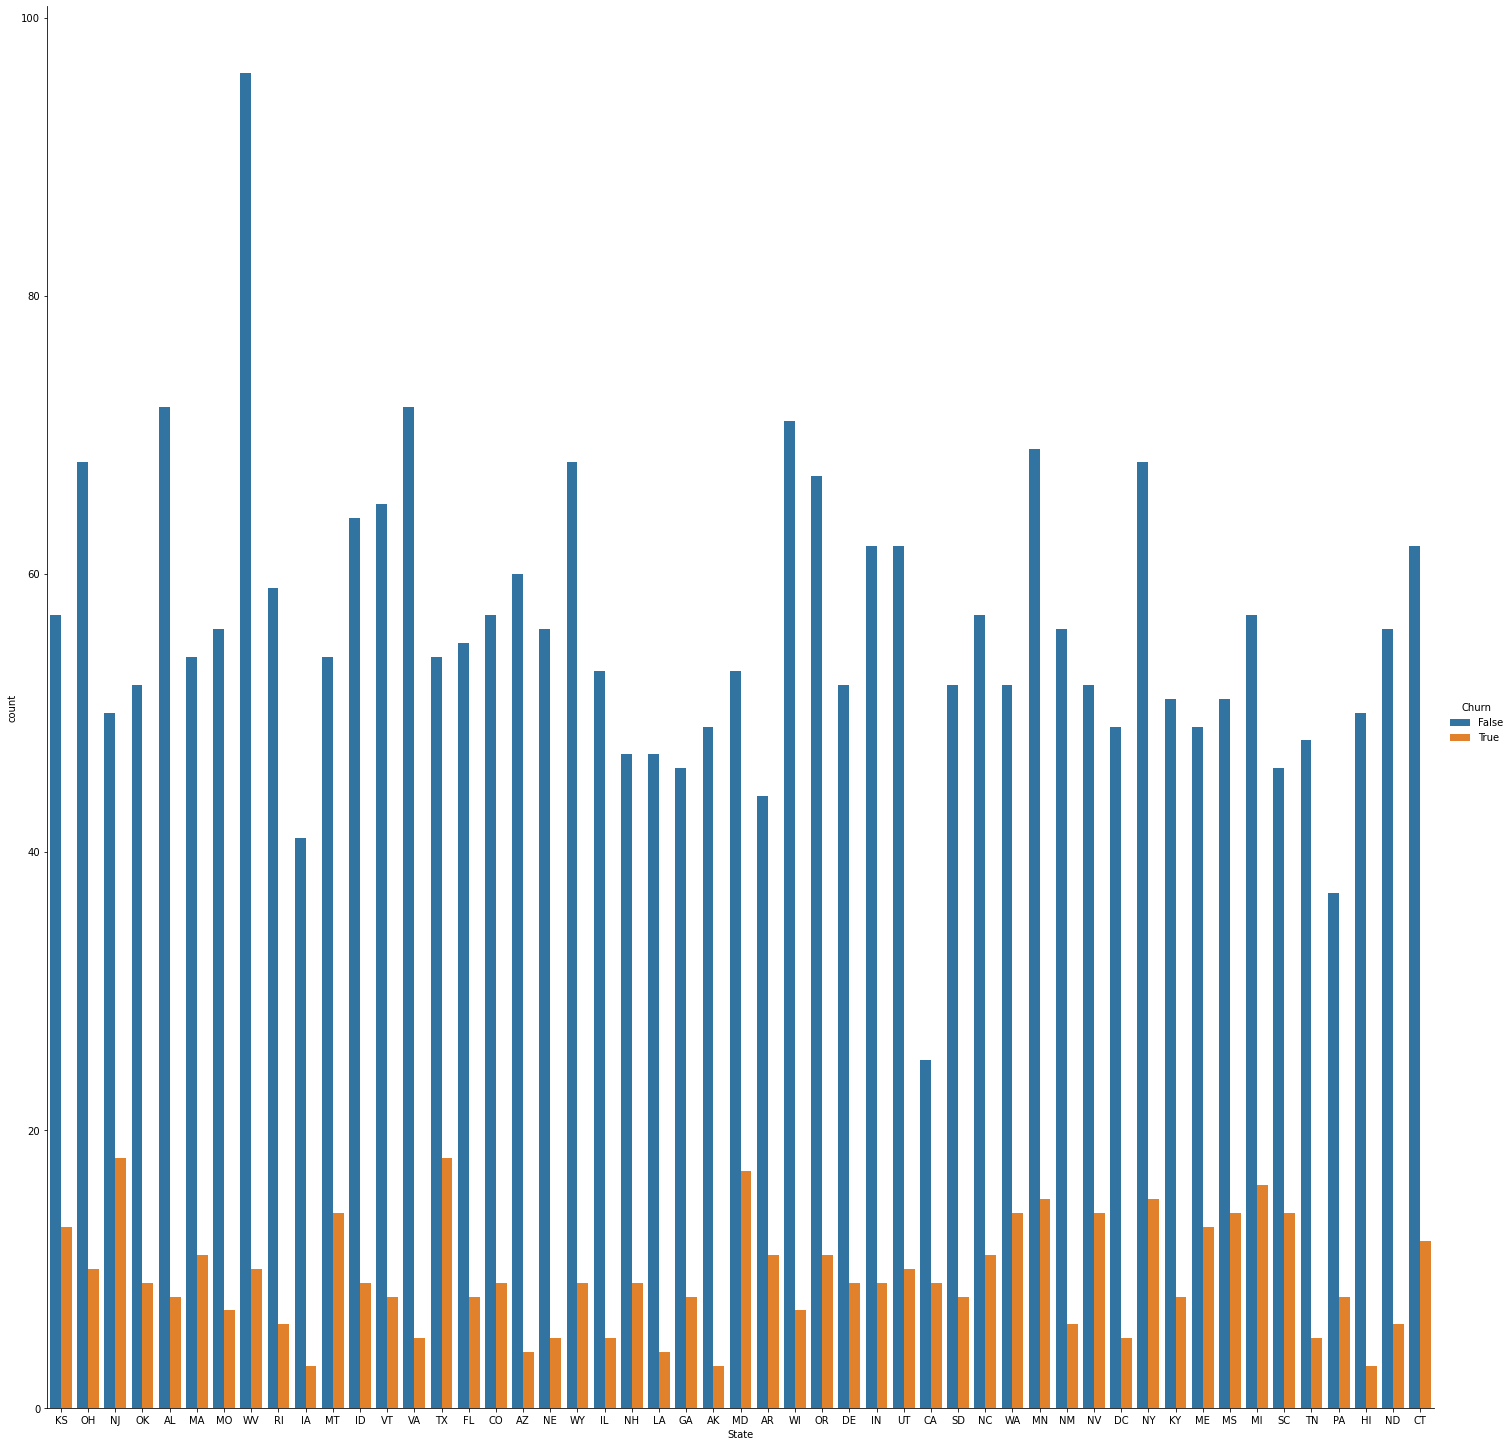

In [10]:
# Vendo state
sns.factorplot('State', data=df,  hue='Churn', kind='count',size=20)

C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


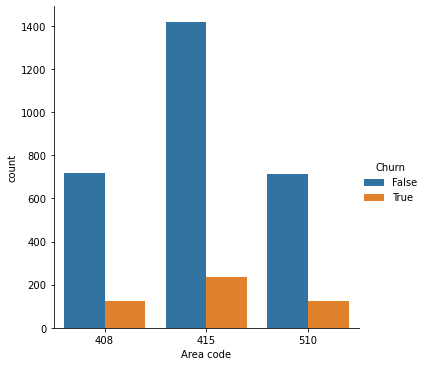

In [11]:
# Vendo area code
sns.factorplot('Area code', data=df,  hue='Churn', kind='count',size=5)

C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


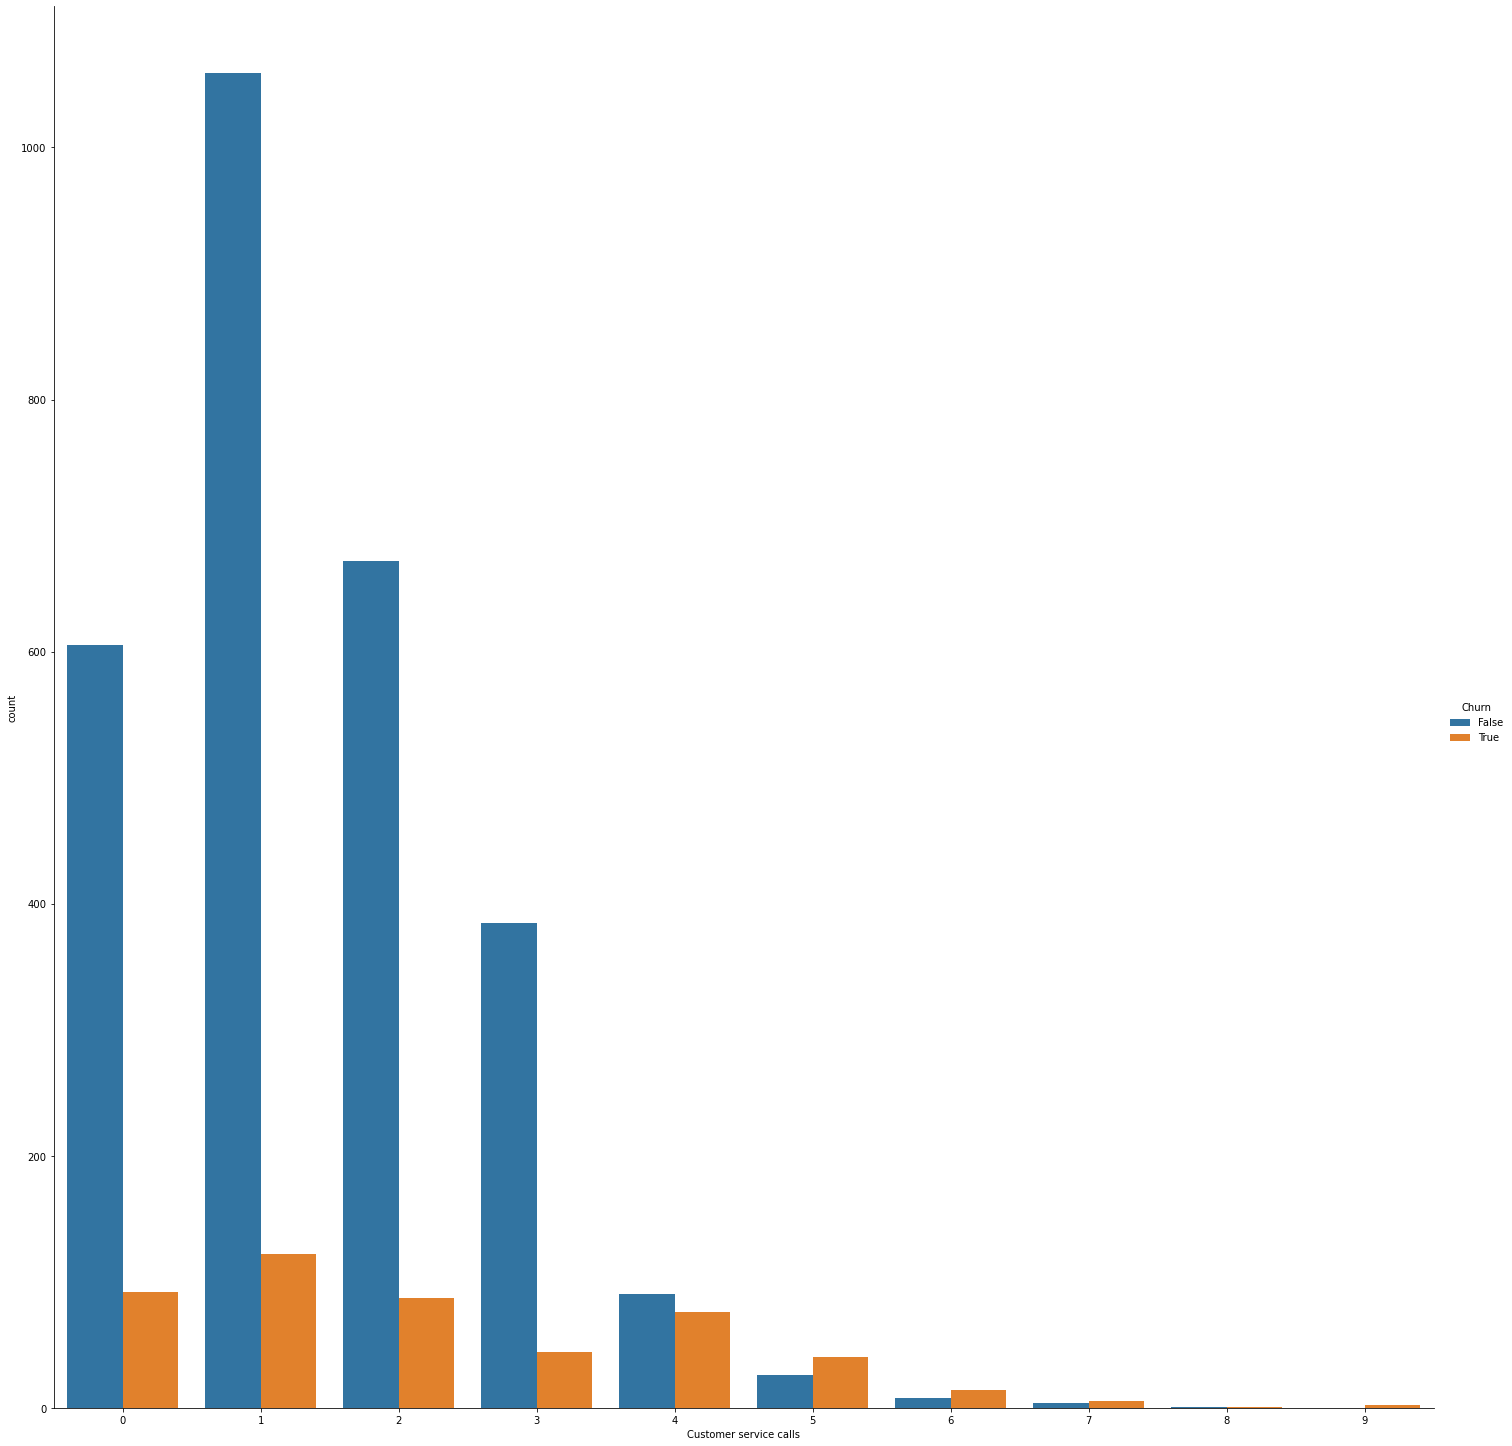

In [12]:
# Vendo padrão, clientes com mais de 4 ligações, tem maior probabilidade de churn 
sns.factorplot('Customer service calls', data=df,  hue='Churn', kind='count',size=20)

C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


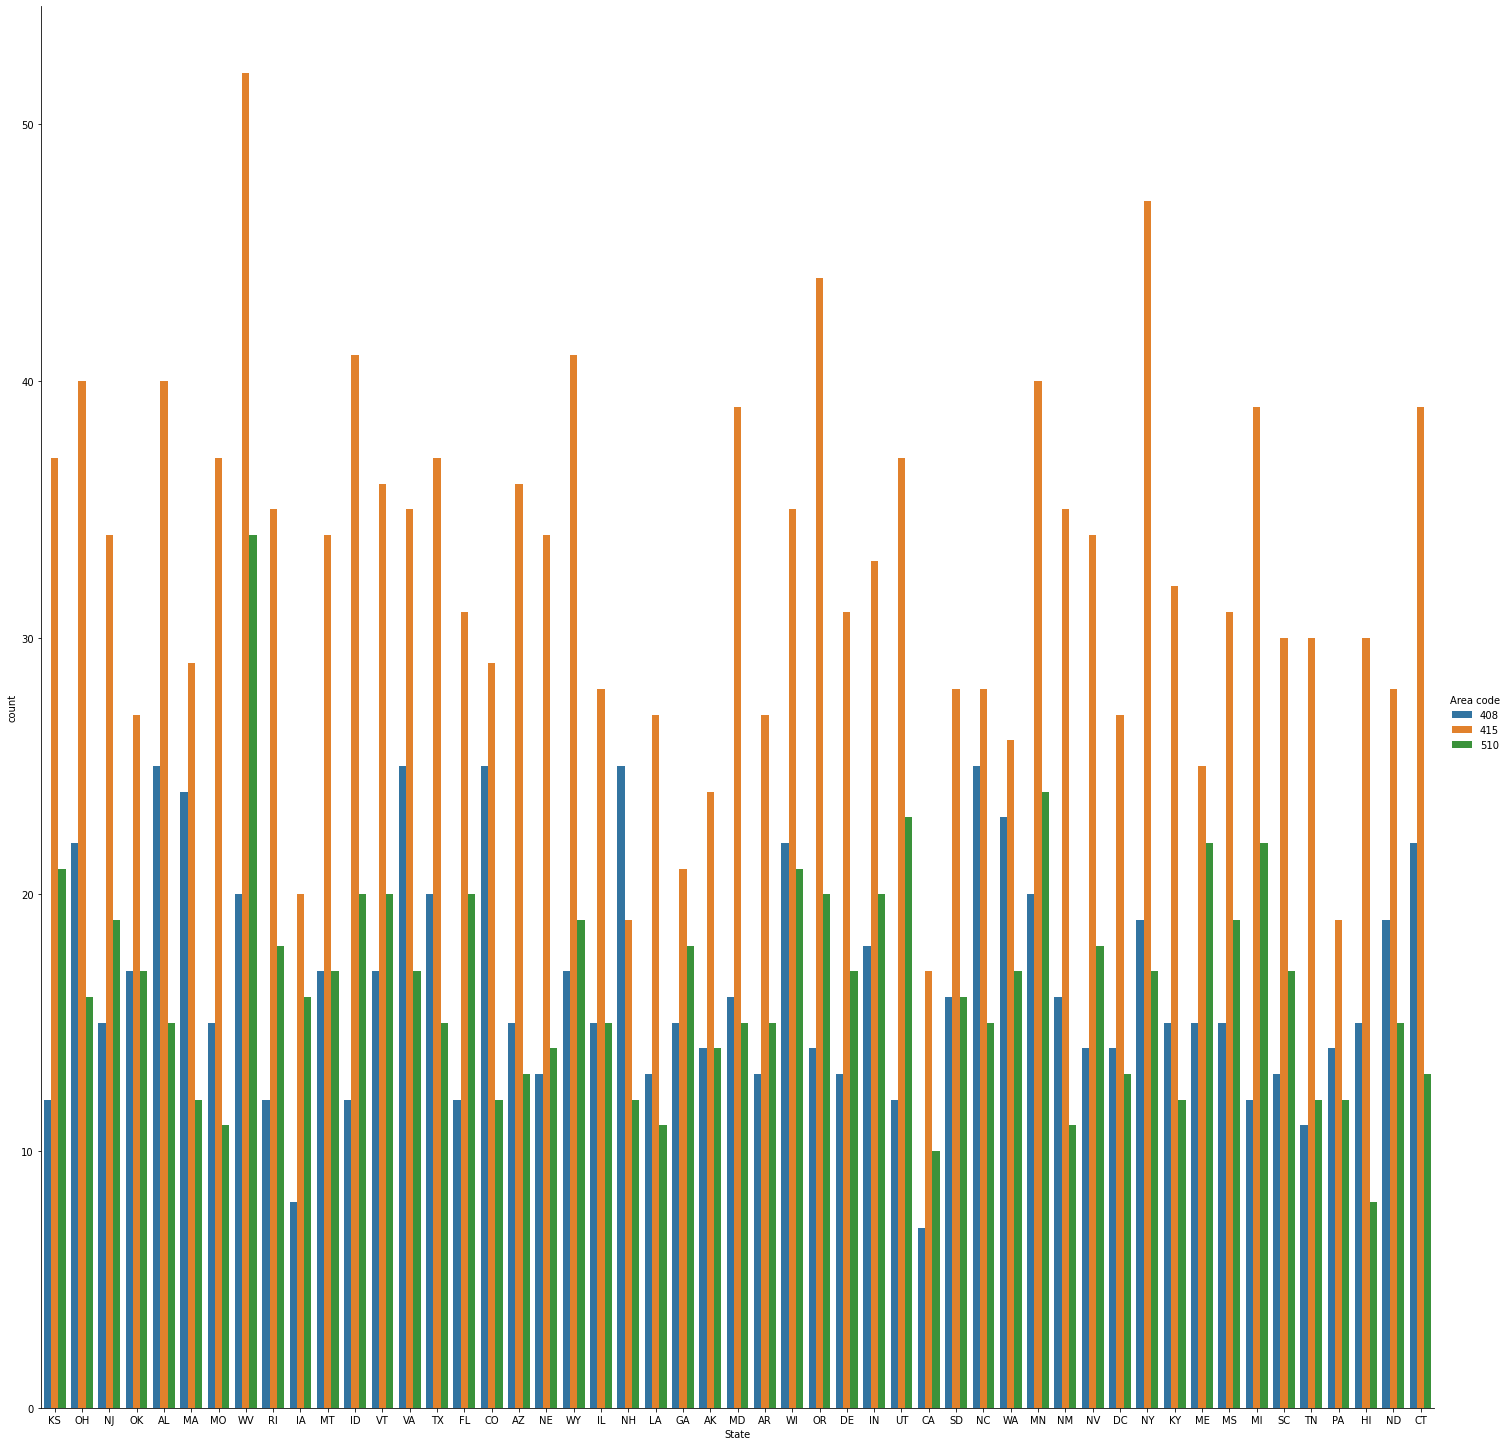

In [13]:
sns.factorplot('State', data=df,  hue='Area code', kind='count',size=20)

In [14]:
df.head(5)    

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


<AxesSubplot:ylabel='Only night'>

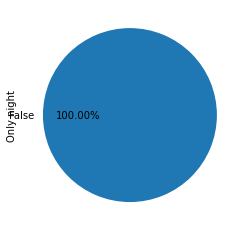

In [15]:
def criar_coluna_apenas_noite(row):
    vmail = row['Number vmail messages'] == 0
    total_day_minutes = row['Total day minutes'] == 0
    total_day_calls = row['Total day calls'] == 0
    total_eve_minutes = row['Total eve minutes'] == 0
    total_eve_calls = row['Total eve calls'] == 0
    total_intl_minutes = row['Total intl minutes'] == 0
    total_intl_calls = row['Total intl calls'] == 0
    
    return (vmail and total_day_minutes and total_day_calls and total_eve_minutes and total_eve_calls and total_intl_minutes and total_intl_calls)

df['Only night'] = df.apply(lambda x: criar_coluna_apenas_noite(x), axis=1)

df['Only night'].value_counts().plot.pie(autopct='%1.2f%%')

C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


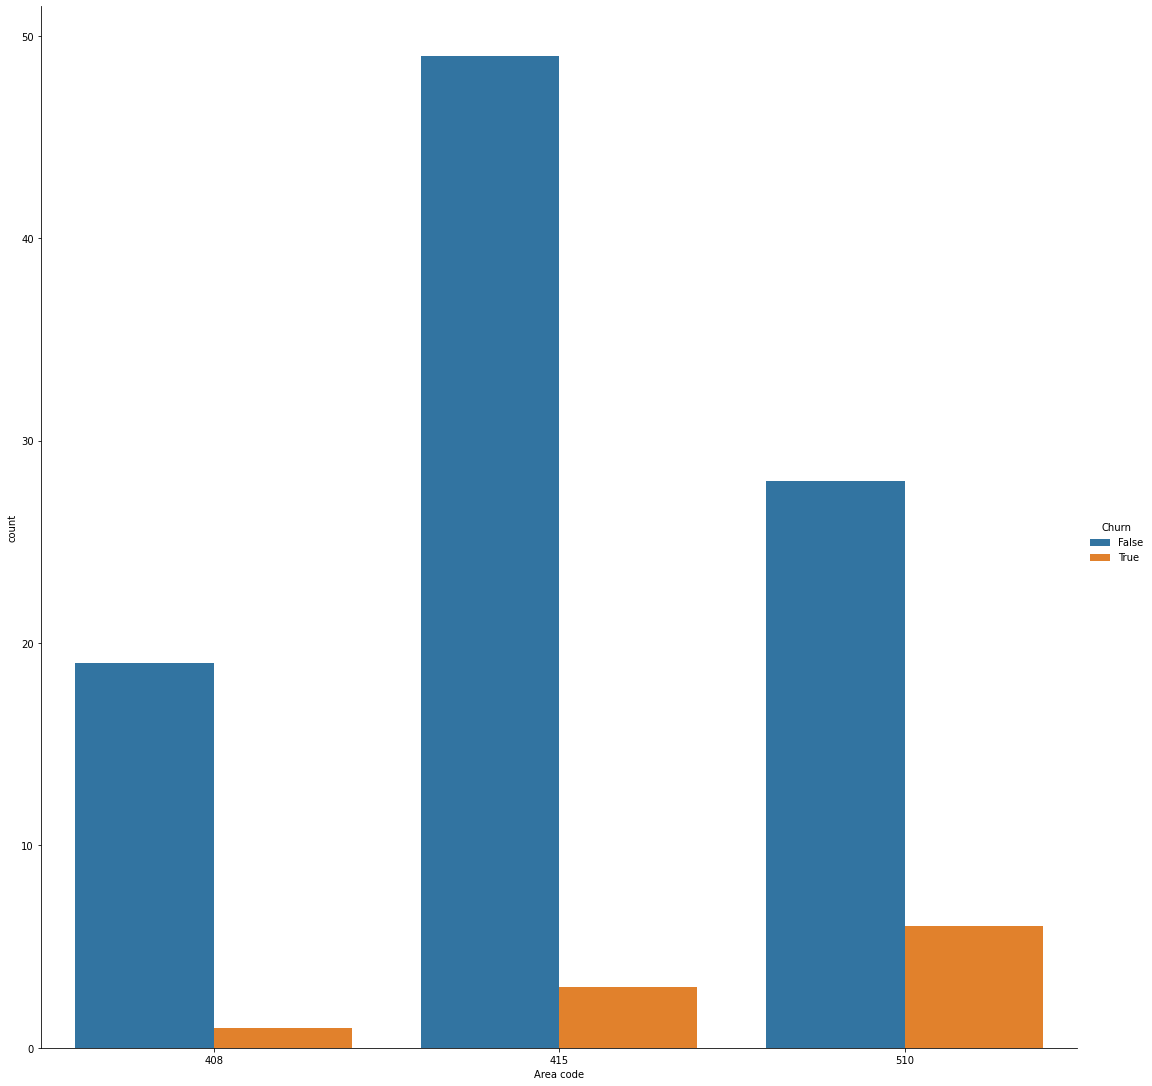

In [16]:
df.drop('Only night', inplace=True, axis=1)
df_wv = df[(df['State'] == 'WV')]

sns.factorplot('Area code', data=df_wv,  hue='Churn', kind='count',size=15)

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,437.182418,42.371290,408.0,408.0,415.0,510.0,510.0
Number vmail messages,3333.0,8.099010,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total eve minutes,3333.0,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7
Total eve calls,3333.0,100.114311,19.922625,0.0,87.0,100.0,114.0,170.0
Total night minutes,3333.0,200.872037,50.573847,23.2,167.0,201.2,235.3,395.0
Total night calls,3333.0,100.107711,19.568609,33.0,87.0,100.0,113.0,175.0
Total intl minutes,3333.0,10.237294,2.791840,0.0,8.5,10.3,12.1,20.0


In [18]:
total_day_zero = df[(df['Total day minutes'] == 0)]
total_day = df[(df['Total day minutes'] != 0)]

print('Day zero: ', len(total_day_zero))
print('Day: ', len(total_day))

Day zero:  2
Day:  3331


In [19]:
total_day_zero.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,2.0,99.50,2.121320,98.0,98.750,99.50,100.250,101.0
Area code,2.0,462.50,67.175144,415.0,438.750,462.50,486.250,510.0
Number vmail messages,2.0,0.00,0.000000,0.0,0.000,0.00,0.000,0.0
Total day minutes,2.0,0.00,0.000000,0.0,0.000,0.00,0.000,0.0
Total day calls,2.0,0.00,0.000000,0.0,0.000,0.00,0.000,0.0
Total eve minutes,2.0,175.85,22.980970,159.6,167.725,175.85,183.975,192.1
Total eve calls,2.0,124.50,7.778175,119.0,121.750,124.50,127.250,130.0
Total night minutes,2.0,167.95,1.202082,167.1,167.525,167.95,168.375,168.8
Total night calls,2.0,91.50,4.949747,88.0,89.750,91.50,93.250,95.0
Total intl minutes,2.0,7.00,0.282843,6.8,6.900,7.00,7.100,7.2


In [20]:
# Removendo linhas sem registros do dia (considerado outlier)
df.drop(df[df['Total day minutes'] == 0].index, inplace = True)

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,3331.0,101.065746,39.834027,1.0,74.0,101.0,127.00,243.0
Area code,3331.0,437.167217,42.363477,408.0,408.0,415.0,510.00,510.0
Number vmail messages,3331.0,8.103873,13.691036,0.0,0.0,0.0,20.00,51.0
Total day minutes,3331.0,179.883038,54.305209,2.6,143.7,179.4,216.50,350.8
Total day calls,3331.0,100.495947,19.923553,30.0,87.0,101.0,114.00,165.0
Total eve minutes,3331.0,200.995437,50.723767,0.0,166.6,201.4,235.30,363.7
Total eve calls,3331.0,100.099670,19.919183,0.0,87.0,100.0,114.00,170.0
Total night minutes,3331.0,200.891804,50.582590,23.2,167.0,201.2,235.35,395.0
Total night calls,3331.0,100.112879,19.573160,33.0,87.0,100.0,113.00,175.0
Total intl minutes,3331.0,10.239237,2.791546,0.0,8.5,10.3,12.10,20.0


In [21]:
total_eve_zero = df[(df['Total eve minutes'] == 0)]
total_eve = df[(df['Total eve minutes'] != 0)]

print('Eve zero: ', len(total_eve_zero))
print('Eve: ', len(total_eve))

Eve zero:  1
Eve:  3330


In [22]:
# Removendo outlier eve minutes
df.drop(df[df['Total eve minutes'] == 0].index, inplace = True)

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,3330.0,101.066967,39.839947,1.0,74.000,101.00,127.000,243.0
Area code,3330.0,437.173874,42.368097,408.0,408.000,415.00,510.000,510.0
Number vmail messages,3330.0,8.106306,13.692371,0.0,0.000,0.00,20.000,51.0
Total day minutes,3330.0,179.874234,54.310988,2.6,143.700,179.40,216.550,350.8
Total day calls,3330.0,100.485886,19.918080,30.0,87.000,101.00,114.000,165.0
Total eve minutes,3330.0,201.055796,50.611602,31.2,166.625,201.40,235.300,363.7
Total eve calls,3330.0,100.129730,19.846467,12.0,87.000,100.00,114.000,170.0
Total night minutes,3330.0,200.899459,50.588256,23.2,167.000,201.25,235.375,395.0
Total night calls,3330.0,100.114715,19.575812,33.0,87.000,100.00,113.000,175.0
Total intl minutes,3330.0,10.238769,2.791834,0.0,8.500,10.30,12.100,20.0


In [23]:
total_msg_zero = df[(df['Number vmail messages'] == 0)]
total_msg = df[(df['Number vmail messages'] != 0)]

print('msg zero: ', len(total_msg_zero))
print('msg: ', len(total_msg))

msg zero:  2408
msg:  922


In [24]:
total_intl_zero = df[(df['Total intl calls'] == 0)]
total_intl = df[(df['Total intl calls'] != 0)]

print('intl zero: ', len(total_intl_zero))
print('intl: ', len(total_intl))

intl zero:  18
intl:  3312


In [25]:
total_serv_zero = df[(df['Customer service calls'] == 0)]
total_serv = df[(df['Customer service calls'] != 0)]

print('serv zero: ', len(total_serv_zero))
print('serv: ', len(total_serv))

serv zero:  697
serv:  2633


In [26]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [27]:
df[df['State']] = 0
df[df['Area code']] = 0

df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,...,MI,SC,TN,PA,HI,ND,CT,415,408,510
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,NJ,137,415,No,No,0,243.4,114,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Transformando categóricos
states = df['State'].unique()
for state in states:
    df.loc[df['State'] == state, state] = 1
    
area_codes = df['Area code'].unique()
for area_code in area_codes:
    df.loc[df['Area code'] == area_code, area_code] = 1
    
df.loc[df['International plan'] == 'No', 'International plan'] = 0
df.loc[df['International plan'] == 'Yes', 'International plan'] = 1
df.loc[df['Voice mail plan'] == 'No', 'Voice mail plan'] = 0
df.loc[df['Voice mail plan'] == 'Yes', 'Voice mail plan'] = 1
df.loc[df['Churn'] == True, 'Churn'] = 1
df.loc[df['Churn'] == False, 'Churn'] = 0

df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,...,MI,SC,TN,PA,HI,ND,CT,415,408,510
0,KS,128,415,0,1,25,265.1,110,197.4,99,...,0,0,0,0,0,0,0,1,0,0
1,OH,107,415,0,1,26,161.6,123,195.5,103,...,0,0,0,0,0,0,0,1,0,0
2,NJ,137,415,0,0,0,243.4,114,121.2,110,...,0,0,0,0,0,0,0,1,0,0
3,OH,84,408,1,0,0,299.4,71,61.9,88,...,0,0,0,0,0,0,0,0,1,0
4,OK,75,415,1,0,0,166.7,113,148.3,122,...,0,0,0,0,0,0,0,1,0,0
5,AL,118,510,1,0,0,223.4,98,220.6,101,...,0,0,0,0,0,0,0,0,0,1
6,MA,121,510,0,1,24,218.2,88,348.5,108,...,0,0,0,0,0,0,0,0,0,1
7,MO,147,415,1,0,0,157.0,79,103.1,94,...,0,0,0,0,0,0,0,1,0,0
8,WV,141,415,1,1,37,258.6,84,222.0,111,...,0,0,0,0,0,0,0,1,0,0
9,RI,74,415,0,0,0,187.7,127,163.4,148,...,0,0,0,0,0,0,0,1,0,0


In [29]:
# Dropando state e area code
df.drop('State', inplace=True, axis=1)
df.drop('Area code', inplace=True, axis=1)

In [30]:
df.shape

(3330, 68)

In [31]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(3330, 68)

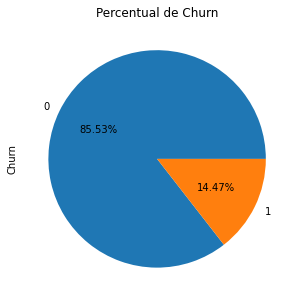

In [32]:
# Mostrando balanceamento
plt.figure(figsize=(5,5))
plt.title('Percentual de Churn')

df['Churn'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

In [33]:
y = df['Churn'].astype('int')
X = df.drop('Churn', axis=1)

y.shape, X.shape

((3330,), (3330, 67))

In [34]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X, y)

len(y_under)

964

In [35]:
# Dataframe com undersampling
df_under = pd.DataFrame(X_under, columns=X.columns)
df_under['Churn'] = y_under
df_under.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,...,SC,TN,PA,HI,ND,CT,415,408,510,Churn
0,86,0,0,0,223.9,75,155.7,109,150.2,143,...,0,0,0,0,0,0,1,0,0,0
1,136,0,0,0,163.4,83,249.3,119,249.7,90,...,0,0,0,0,0,0,1,0,0,0
2,122,0,1,30,230.1,108,287.6,76,177.1,85,...,0,0,0,0,0,0,0,0,1,0
3,64,0,0,0,219.2,73,167.0,65,161.4,119,...,0,0,0,0,0,0,0,0,1,0
4,121,0,0,0,103.3,110,129.1,82,167.1,113,...,0,0,0,0,0,0,1,0,0,0


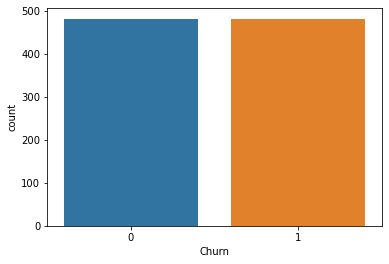

In [36]:
sns.countplot(data=df_under, x='Churn');

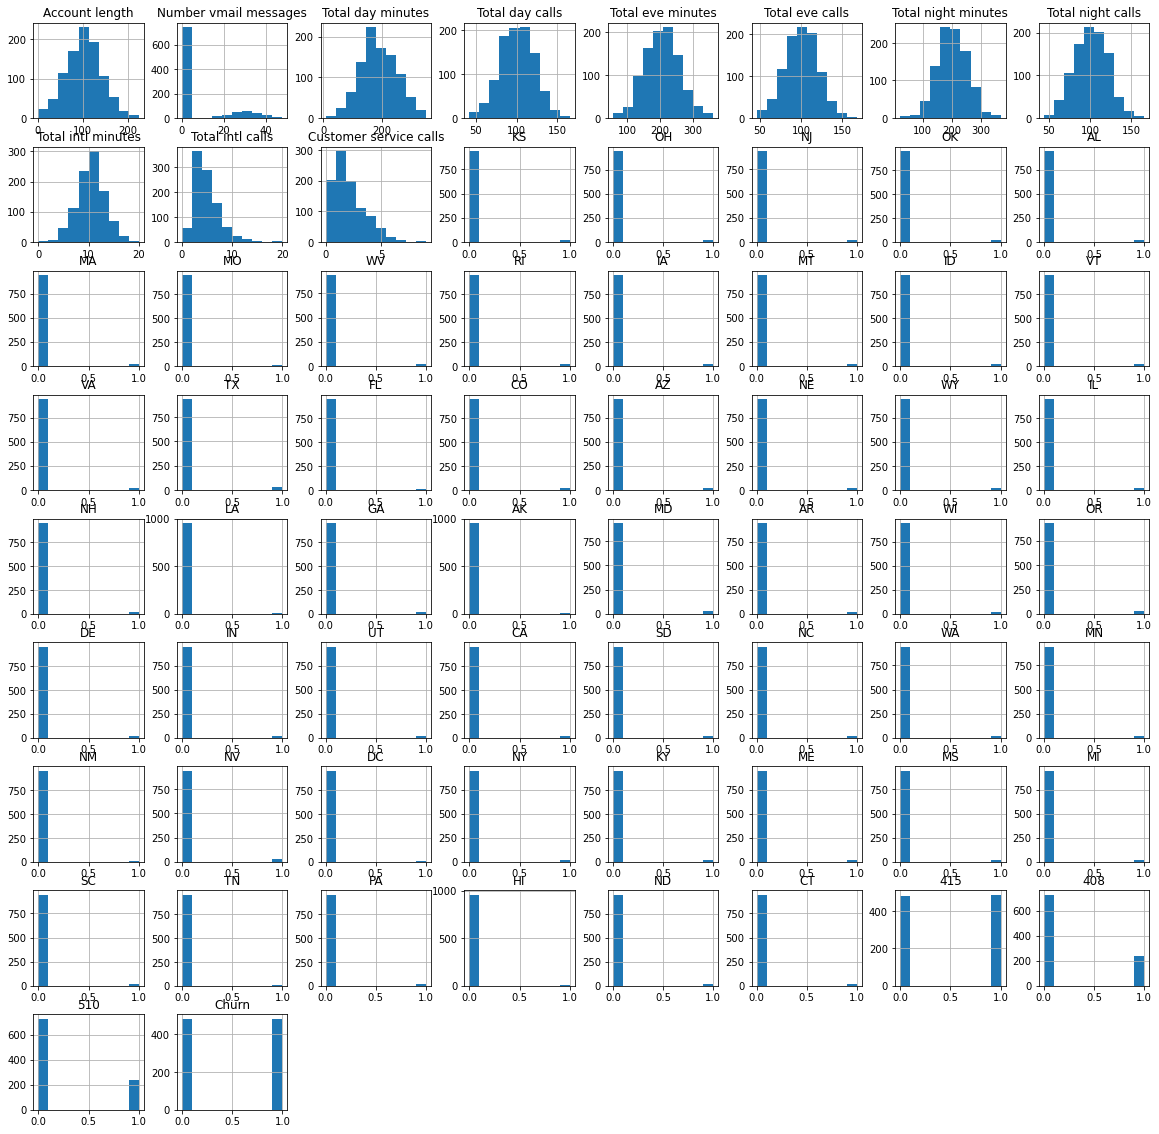

In [37]:
df_under.hist(figsize = (20, 20))
plt.show()

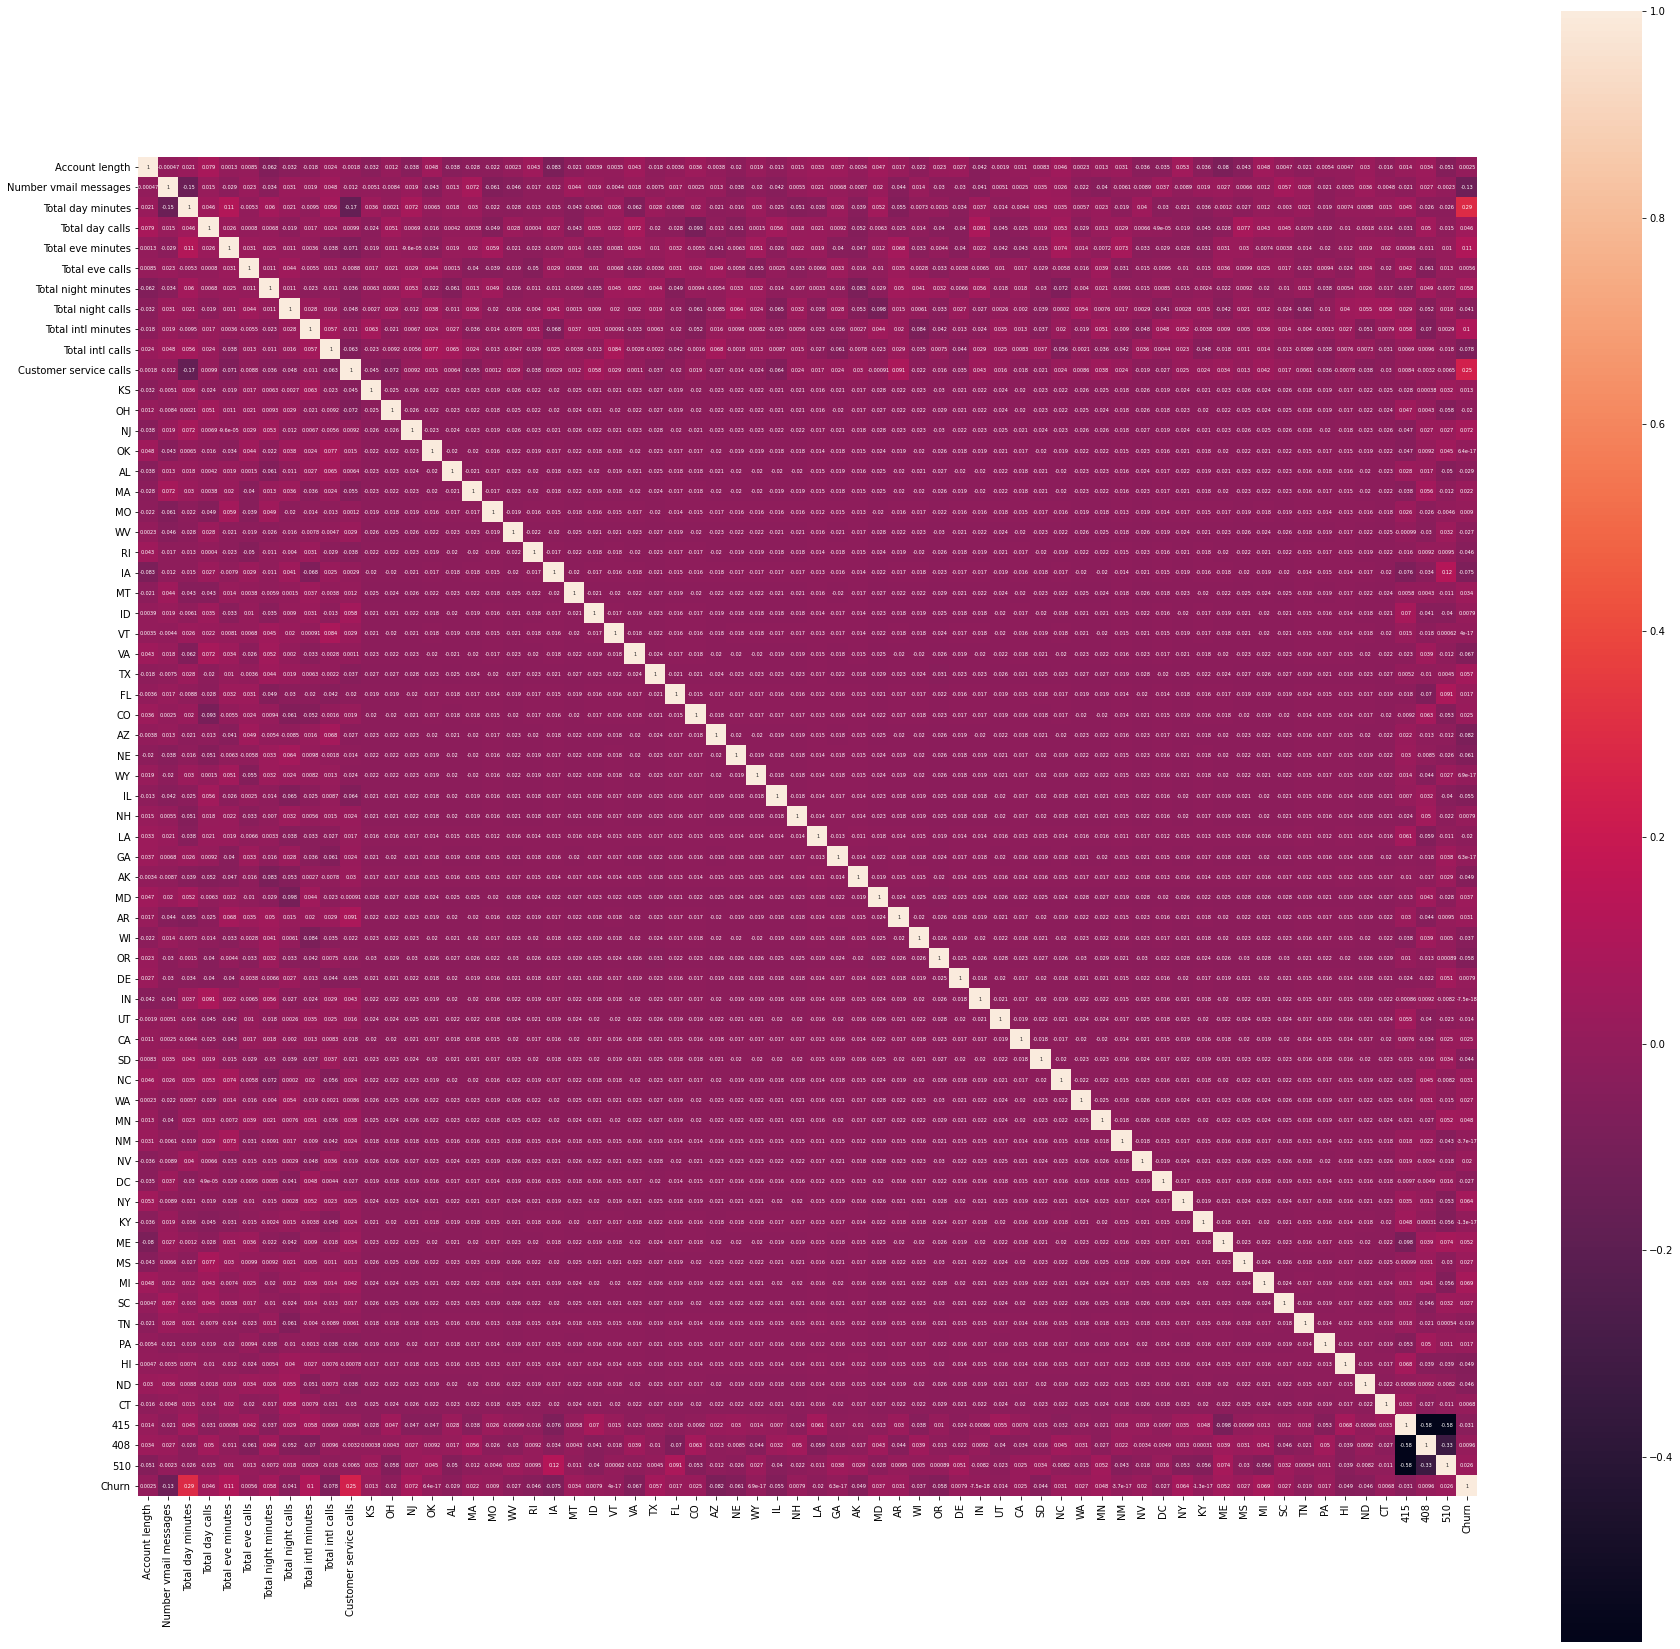

In [38]:
# Mapa de calor
corr = df_under.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot_kws={'size': 5}, square=True, annot=True)

plt.show()

In [39]:
#sns.pairplot(df_under)
#plt.show();

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2, random_state = 0, stratify = y_under)

In [43]:
from sklearn.preprocessing import StandardScaler

# Aplicando escala
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 2.08167402, -0.45034222,  1.90177982, ..., -0.55787498,
         1.7186757 , -1.00129786],
       [ 0.00259672, -0.45034222, -0.52582323, ...,  1.79251632,
        -0.58184334, -1.00129786],
       [ 1.28597777, -0.45034222, -0.52582323, ..., -0.55787498,
        -0.58184334,  0.99870382],
       ...,
       [-0.58775856,  2.22053355, -0.52582323, ..., -0.55787498,
         1.7186757 , -1.00129786],
       [ 0.13093483, -0.45034222, -0.52582323, ..., -0.55787498,
         1.7186757 , -1.00129786],
       [-0.66476142, -0.45034222,  1.90177982, ..., -0.55787498,
         1.7186757 , -1.00129786]])

In [59]:
import itertools

def plot_confusion_matrix(pred_test, classes=['Não Churn','Churn'], normalize=False, title='Matriz confusão', cmap=plt.cm.Blues):
    rounded_pred = pred_test
    cm = confusion_matrix(y_true=y_test, y_pred=rounded_pred)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def evaluate_model(proba, y_test, y_pred):
    s1 = accuracy_score(y_test, y_pred).round(3)
    s2 = precision_score(y_test, y_pred, average='weighted').round(3)
    s3 = recall_score(y_test, y_pred, average='weighted').round(3)
    s4 = f1_score(y_test, y_pred, average='weighted').round(3)
    s5 = roc_auc_score(y_test, proba, average='weighted').round(3)
    print("Accuracy ", s1)
    print("Precision ", s2)
    print("Recall ", s3)
    print("f1 score ", s4)
    print("ROC_AUC ", s5)

Accuracy  0.979
Precision  0.979
Recall  0.979
f1 score  0.979
ROC_AUC  0.998
Confusion matrix, without normalization
[[94  3]
 [ 1 95]]


C:\Users\THIAGOSILVADEOLIVEIR\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


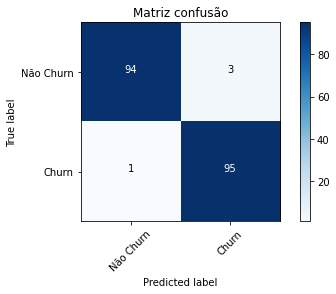

In [60]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=50, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

prob = mlp.predict_proba(X_test)[:,1]

evaluate_model(prob, y_test, y_pred)
plot_confusion_matrix(y_pred, title='Matriz confusão')

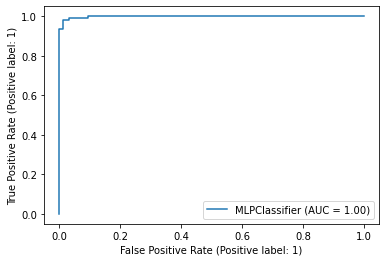

In [62]:
from sklearn import metrics

def plot_ROC(clf, X_test, y_test):
    metrics.plot_roc_curve(clf, X_test, y_test)  
    plt.show() 
    
plot_ROC(mlp, X_test, y_test)

Accuracy  1.0
Precision  1.0
Recall  1.0
f1 score  1.0
ROC_AUC  1.0
Confusion matrix, without normalization
[[97  0]
 [ 0 96]]


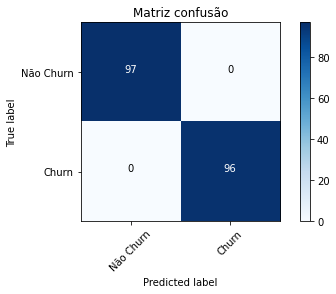

In [69]:
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
prob = rf.predict_proba(X_test)[:,1]

evaluate_model(prob, y_test, y_pred)
plot_confusion_matrix(y_pred, title='Matriz confusão')

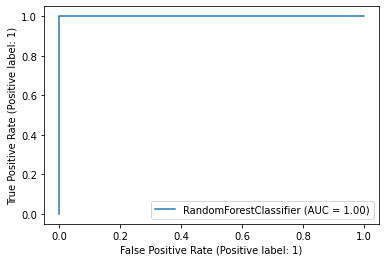

In [70]:
plot_ROC(rf, X_test, y_test)

Accuracy  1.0
Precision  1.0
Recall  1.0
f1 score  1.0
ROC_AUC  1.0
Confusion matrix, without normalization
[[97  0]
 [ 0 96]]


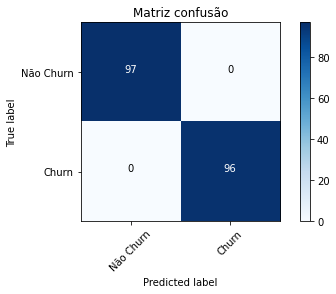

In [74]:
abc = AdaBoostClassifier(n_estimators=2, random_state=0, algorithm='SAMME')
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
prob = abc.predict_proba(X_test)[:,1]

evaluate_model(prob, y_test, y_pred)
plot_confusion_matrix(y_pred, title='Matriz confusão')

In [79]:
def create_model_sequential(opt):
    model = Sequential()
    model.add(Dense(36, input_dim=68, activation='relu'))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

def plot_accuracy(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def plot_loss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

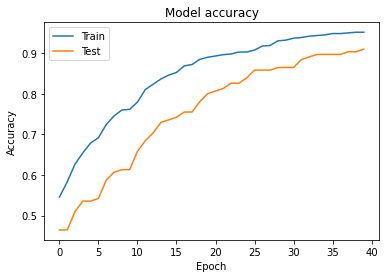

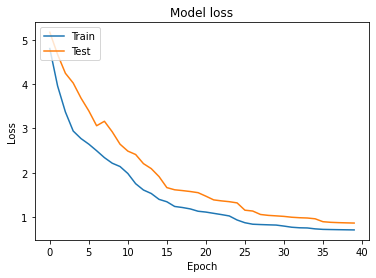

In [87]:
from tensorflow.keras import optimizers

adam = optimizers.Adam()
opt_weights = adam.get_weights()
model = create_model_sequential(adam)
md_weights = model.get_weights()

history = model.fit(X_train, y_train, epochs=40, validation_split=0.2, verbose=0)
pred_test = model.predict(X_test)

plot_accuracy(history)
plot_loss(history)

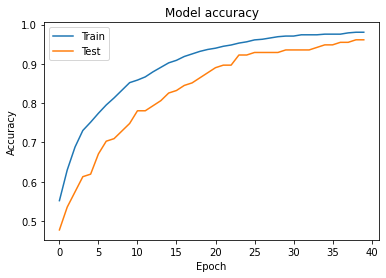

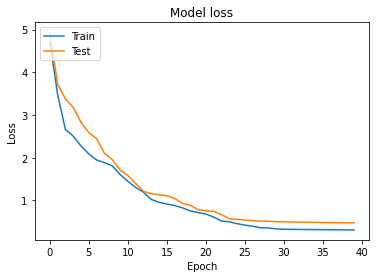

In [92]:
adam = optimizers.Adam(learning_rate=0.001)
adam.set_weights(opt_weights)
model = create_model_sequential(adam)
model.set_weights(md_weights)

history = model.fit(X_train, y_train, epochs=40, validation_split=0.2, verbose=0)

plot_accuracy(history)
plot_loss(history)